## Homework
By starting from the notebook 04, build your own model by using nn.Sequential and perform some changes to the
training setting (like the optimizer, or its parameters). Then, train it on the spiral dataset and observe how the space
is separated by plotting it.

For any question, contact me by email.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from torch import nn, optim
from IPython import display
from utils.visual import set_default, plot_data, plot_model
set_default()

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(device))

Device: cpu


In [33]:
torch.manual_seed(41)
N = 2000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 500  # num_hidden_units

In [34]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * np.pi / C) * (c),
        # When t = 1
        (2 * np.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            np.sin(inner_var[index]), np.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.size())
print("y:", y.size())

Shapes:
X: torch.Size([6000, 2])
y: torch.Size([6000])


In [35]:
y

tensor([0, 0, 0,  ..., 2, 2, 2])

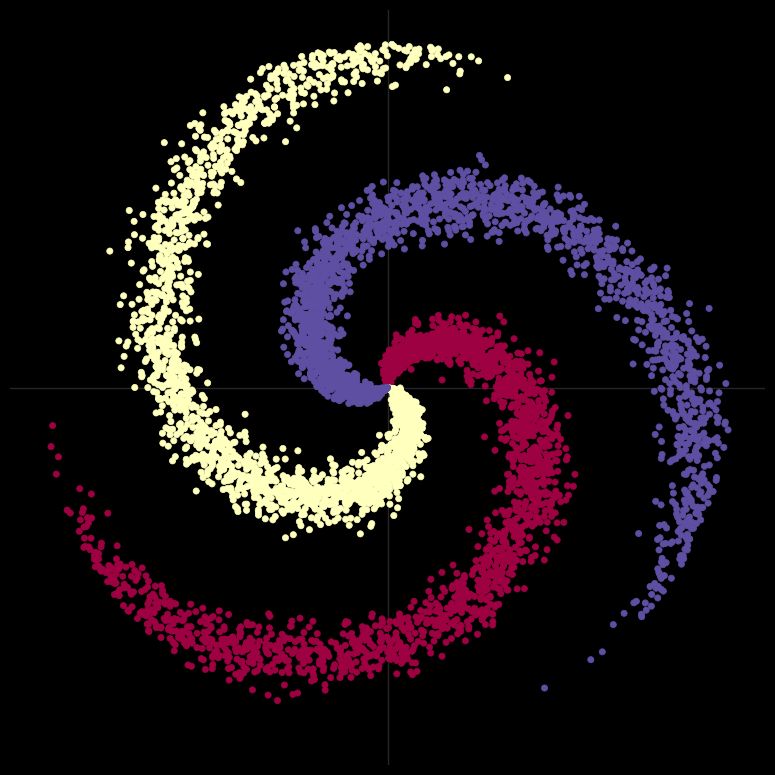

In [36]:
# visualise the data
plot_data(X, y)

In [43]:
# %%timeit

lr = 1e-3
lambdaL2 = 1e-5
epochs = 10

model = nn.Sequential(
            nn.Linear(D, H),
            nn.ReLU(),
            nn.Linear(H, C))
model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=lambdaL2)

for e in range(epochs):
    
    # forward pass: compute prediction
    y_pred = model(X)
    
    # loss computation
    loss = criterion(y_pred, y) 
    print("[EPOCH]: {}, [LOSS]: {}".format(e, loss.item()))
    display.clear_output(wait=True)
    
    # zero gradient
    optimizer.zero_grad()
    
    # backward pass: get gradients dLoss/dw
    loss.backward()
    
    #update weights wrt to optimizer method
    optimizer.step()

[EPOCH]: 9, [LOSS]: 0.8715254664421082


Sequential(
  (0): Linear(in_features=2, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=3, bias=True)
)


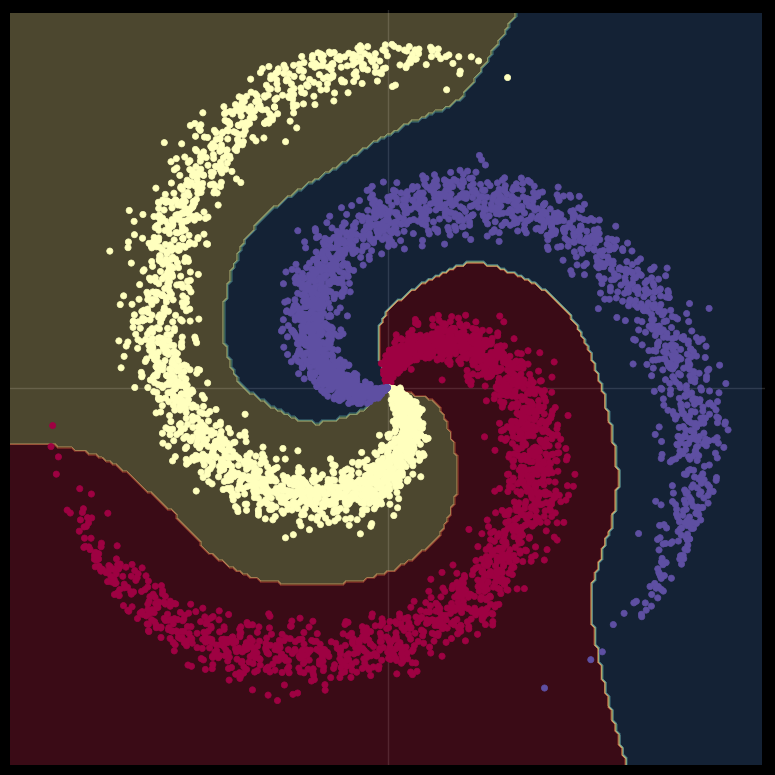

In [38]:
# Plot trained model
set_default()
print(model)
plot_model(X, y, model)